In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [63]:
df = pd.read_csv('NewData2.csv')
df

,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162480,93,TCP,SF,NormalTraffic,2,1DQ9Lp7XYQ,1EbKLq5XY,0,0,85,C,Normal,41551,B
162481,98,TCP,SF,NormalTraffic,4,1DQ9Lp7XYQ,1EbKLq5XY,0,0,451,C,Normal,41551,B
162482,58,TCP,SF,NormalTraffic,1,1DQ9Lp7XYQ,1EbKLq5XY,0,0,346,C,Normal,443,B
162483,48,TCP,SF,NormalTraffic,8,1DQ9Lp7XYQ,1EbKLq5XY,0,0,172,C,Normal,443,B


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162485 entries, 0 to 162484
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           162485 non-null  int64 
 1   Protcol        162485 non-null  object
 2   Flag           162485 non-null  object
 3   Family         162485 non-null  object
 4   Clusters       162485 non-null  int64 
 5   SeddAddress    162485 non-null  object
 6   ExpAddress     162485 non-null  object
 7   BTC            162485 non-null  int64 
 8   USD            162485 non-null  int64 
 9   Netflow_Bytes  162485 non-null  int64 
 10  IPaddress      162485 non-null  object
 11  Threats        162485 non-null  object
 12  Port           162485 non-null  int64 
 13  Prediction     162485 non-null  object
dtypes: int64(6), object(8)
memory usage: 17.4+ MB


In [65]:
df['Prediction'].value_counts()

Prediction
S     66380
A     42561
SS    40102
B     13442
Name: count, dtype: int64

#### Convert category to numerical data

In [68]:
from sklearn.preprocessing import LabelEncoder
new = ['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress', 'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats', 'Port', 'Prediction']
lab=LabelEncoder()
for i in df[new]:
    df[i]=lab.fit_transform(df[i])
df

,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,56,1,0,17,0,4,4,1,457,4,0,1,6,3
1,46,1,0,17,0,4,4,1,461,7,0,1,6,3
2,36,1,0,17,0,4,4,1,465,6,0,1,6,3
3,26,1,0,17,0,4,4,1,469,14,0,1,6,3
4,63,1,0,17,0,4,4,1,473,8,0,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162480,99,1,17,13,1,5,8,0,0,84,2,4,485,1
162481,104,1,17,13,3,5,8,0,0,450,2,4,485,1
162482,64,1,17,13,0,5,8,0,0,345,2,4,3,1
162483,54,1,17,13,7,5,8,0,0,171,2,4,3,1


<Axes: >

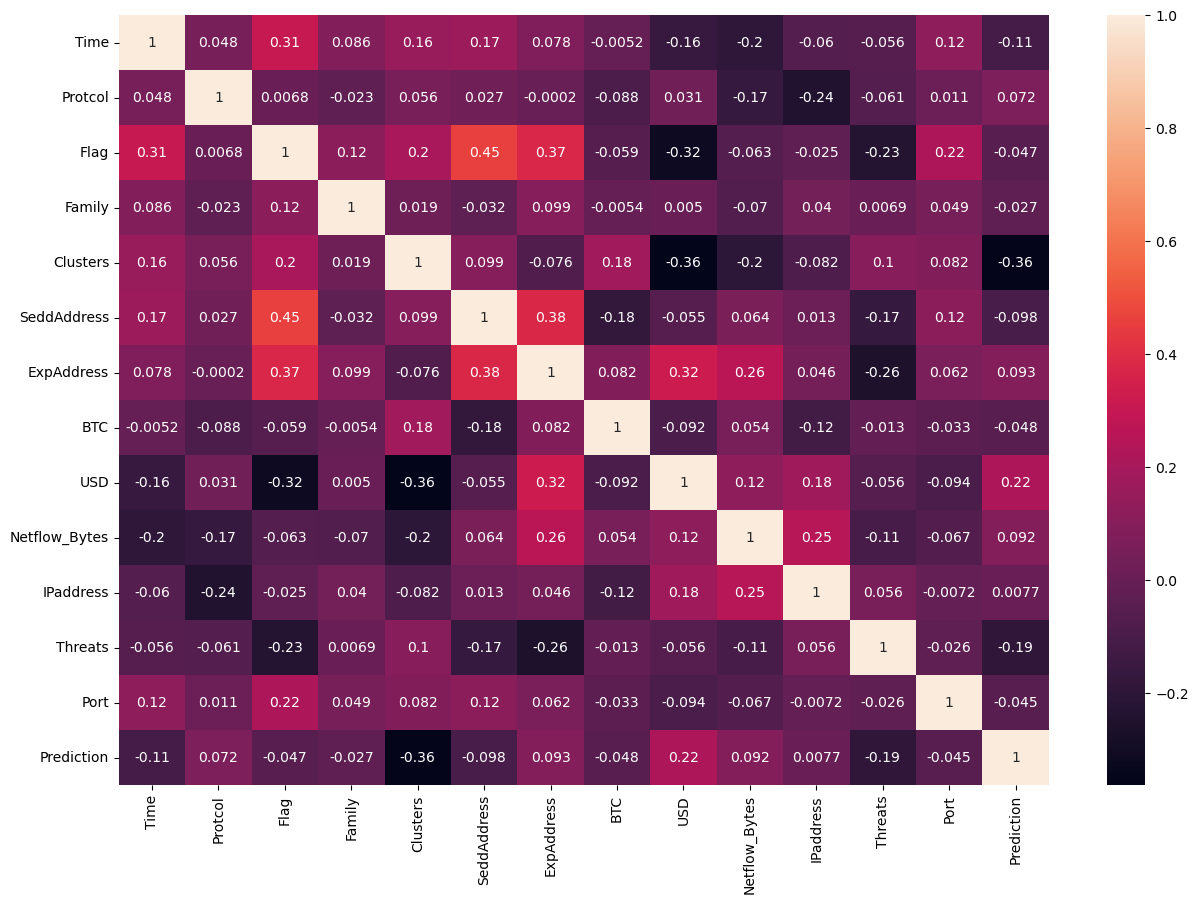

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [70]:
df['Prediction'].value_counts()

Prediction
2    66380
0    42561
3    40102
1    13442
Name: count, dtype: int64

#### Selecting the features for Model training

In [71]:
selected_features = ['Flag', 'SeddAddress', 'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats', 'Port'] 
X = df[selected_features]  
y = df['Prediction']

In [72]:
X.head()

,Flag,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port
0,0,4,4,1,457,4,0,1,6
1,0,4,4,1,461,7,0,1,6
2,0,4,4,1,465,6,0,1,6
3,0,4,4,1,469,14,0,1,6
4,0,4,4,1,473,8,0,1,6


In [73]:
y.sample(5)

3950      3
24168     2
114331    2
21896     2
29344     2
Name: Prediction, dtype: int64

#### Feature Scaling -> Standardization

In [74]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)
X

array([[-1.07635706, -0.38534377, -0.72494052, ..., -1.27009296,
        -1.32330182, -0.09859941],
       [-1.07635706, -0.38534377, -0.72494052, ..., -1.27009296,
        -1.32330182, -0.09859941],
       [-1.07635706, -0.38534377, -0.72494052, ..., -1.27009296,
        -1.32330182, -0.09859941],
       ...,
       [ 2.74870805, -0.23435875, -0.2698044 , ...,  0.92771696,
        -0.31628905, -0.13480645],
       [ 2.74870805, -0.23435875, -0.2698044 , ...,  0.92771696,
        -0.31628905, -0.13480645],
       [ 2.74870805, -0.23435875, -0.2698044 , ...,  0.92771696,
        -0.31628905, -0.13480645]])

#### Spliting the data for train, test, and validation

In [75]:
from sklearn.model_selection import train_test_split
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [76]:
X_train.shape,X_temp.shape, X_val.shape, X_test.shape

((97491, 9), (64994, 9), (32497, 9), (32497, 9))

#### Create Hybrid Model and Calculate the train, test and validation accuracy

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [78]:
# Initialize classifiers
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=50)
knn = KNeighborsClassifier(n_neighbors=5)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)

In [79]:
# Create a hybrid model using VotingClassifier
hybrid_model = VotingClassifier(
    estimators=[
        ('dt', dt),
        ('rf', rf),
        ('knn', knn),
        ('bagging', bagging)
    ],
    voting='hard'
)

In [80]:
# Training with epochs
epochs = 10
train_acc_list = []
val_acc_list = []

for epoch in range(1, epochs + 1):
    # Train the model
    hybrid_model.fit(X_train, y_train)
    
    # Calculate training accuracy
    y_train_pred = hybrid_model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_acc)
    
    # Calculate validation accuracy
    y_val_pred = hybrid_model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_acc)
    
    print(f"Epoch {epoch}/{epochs}: Training Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")

Epoch 1/10: Training Accuracy = 0.9900, Validation Accuracy = 0.9775
Epoch 2/10: Training Accuracy = 0.9900, Validation Accuracy = 0.9775
Epoch 3/10: Training Accuracy = 0.9900, Validation Accuracy = 0.9775
Epoch 4/10: Training Accuracy = 0.9900, Validation Accuracy = 0.9774
Epoch 5/10: Training Accuracy = 0.9901, Validation Accuracy = 0.9775
Epoch 6/10: Training Accuracy = 0.9901, Validation Accuracy = 0.9773
Epoch 7/10: Training Accuracy = 0.9900, Validation Accuracy = 0.9775
Epoch 8/10: Training Accuracy = 0.9900, Validation Accuracy = 0.9771
Epoch 9/10: Training Accuracy = 0.9900, Validation Accuracy = 0.9774
Epoch 10/10: Training Accuracy = 0.9901, Validation Accuracy = 0.9773


In [81]:
# Test the model
y_test_pred = hybrid_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9786


#### Calculate FP and FN percentages for each class

In [82]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2, 3])

num_classes = cm.shape[0]
fp_percentages = []
fn_percentages = []

for i in range(num_classes):
    # False positives: sum of column i excluding the diagonal
    fp = cm[:, i].sum() - cm[i, i]
    # False negatives: sum of row i excluding the diagonal
    fn = cm[i, :].sum() - cm[i, i]
    # Total samples excluding the current class
    total_samples = cm.sum() - cm[i, :].sum()  

    # Calculate percentages
    fp_percentage = (fp / total_samples) * 100 if total_samples > 0 else 0
    fn_percentage = (fn / cm[i, :].sum()) * 100 if cm[i, :].sum() > 0 else 0

    fp_percentages.append(fp_percentage)
    fn_percentages.append(fn_percentage)

# Display results
for cls, fp, fn in zip(range(num_classes), fp_percentages, fn_percentages):
    print(f"Class {cls}:")
    print(f"  False Positive Percentage: {fp:.2f}%")
    print(f"  False Negative Percentage: {fn:.2f}%")


Class 0:
  False Positive Percentage: 1.27%
  False Negative Percentage: 2.97%
Class 1:
  False Positive Percentage: 0.00%
  False Negative Percentage: 0.00%
Class 2:
  False Positive Percentage: 1.17%
  False Negative Percentage: 2.07%
Class 3:
  False Positive Percentage: 0.68%
  False Negative Percentage: 2.10%


#### Calculate total False Positives and False Negatives

In [83]:
total_fp = np.sum(np.sum(cm, axis=0) - np.diag(cm)) 
total_fn = np.sum(np.sum(cm, axis=1) - np.diag(cm))
# Total samples in the dataset
total_samples = np.sum(cm)

# Calculate percentages
overall_fp_percentage = (total_fp / (total_samples - np.trace(cm))) * 100  # Excluding diagonal
overall_fn_percentage = (total_fn / total_samples) * 100  # Relative to total samples

# Display results
print(f"Overall False Positive Percentage: {overall_fp_percentage:.2f}%")
print(f"Overall False Negative Percentage: {overall_fn_percentage:.2f}%")


Overall False Positive Percentage: 100.00%
Overall False Negative Percentage: 2.14%


FP% 100.00% means that all samples that are not of the current class are classified as the current class. So, overall FP% is not a good metric to evaluate the model. We should focus on the FP% and FN% for each class.

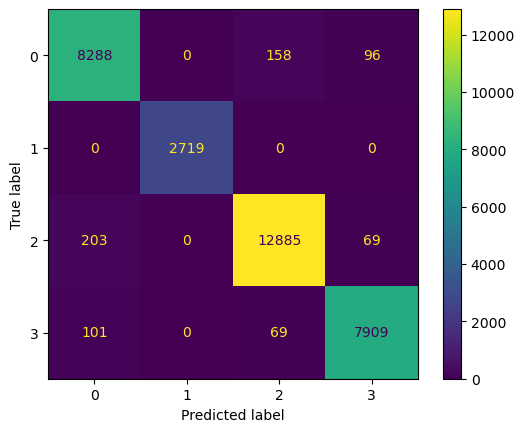

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
cm_persentage = cm.astype('float')/cm.sum()*100
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hybrid_model.classes_)
disp.plot()
plt.show()